# Explore `taskmaster-1`

In [2]:
import json
from plotnine import *
import pandas as pd
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings('ignore')

data_path= 'data/taskmaster1/'

In [6]:
# #process data
# with open(f'{data_path}self-dialogs.json','r') as f:
#     self_dialogs = json.load(f)
# self_dfs = []
# for i in tqdm_notebook(range(len(self_dialogs))):
#     if len(self_dialogs[i]['utterances'])> 0:
#         self_df = pd.DataFrame(self_dialogs[i]['utterances'])
#         self_df['conversation_id'] = self_dialogs[i]['conversation_id']
#         self_df['instruction_id'] = self_dialogs[i]['instruction_id']
#         self_df = self_df[['conversation_id','instruction_id','index','speaker','text']]
#         self_df['nb_token'] = self_df.text.map(lambda x: len(x.split()))
#         self_df['nb_char'] = self_df.text.map(lambda x: len(x))
#         self_dfs.append(self_df)
# self_df = pd.concat(self_dfs)
# self_df.to_csv(f'{data_path}self_df.csv',index=False)

In [7]:
self_df = pd.read_csv(f'{data_path}self_df.csv')
self_df['conversation_type'] = 'self'
oz_df = pd.read_csv(f'{data_path}oz_df.csv')
oz_df['conversation_type'] = 'oz'
all_df = pd.concat([self_df,oz_df],0).reset_index(drop=True)

In [8]:
#number of conversations
all_df.groupby(['conversation_type']).conversation_id.apply(lambda x: len(set(x)))

conversation_type
oz      5498
self    7708
Name: conversation_id, dtype: int64

In [9]:
#number of utterances
all_df.conversation_type.value_counts()

self    169469
oz      132407
Name: conversation_type, dtype: int64

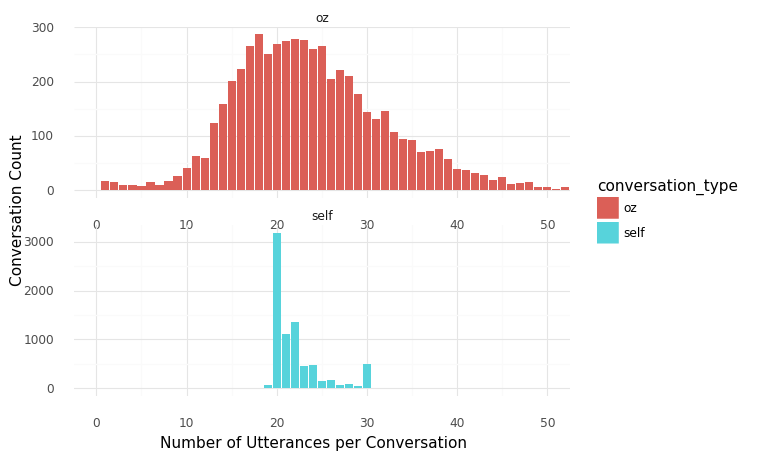

<ggplot: (8757586975075)>

In [11]:
#utterances per conversation
utter_df = all_df[['conversation_type','conversation_id','text']]\
    .groupby(['conversation_type','conversation_id'])\
    .count().reset_index()\
    .groupby(['conversation_type','text']).count().reset_index()
utter_df.columns = ['conversation_type','utterances','nb_conversations']
g = (ggplot(utter_df,aes(x='utterances',y='nb_conversations',fill='conversation_type')) + 
    geom_col() + theme_minimal() + coord_cartesian(xlim=[0,50]) +
    facet_wrap('~conversation_type',ncol=1,scales='free') +
    xlab('Number of Utterances per Conversation') + ylab('Conversation Count'))
g

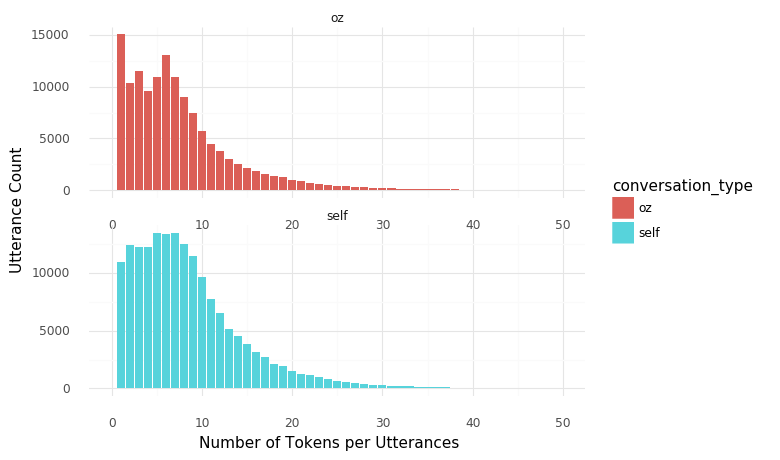

<ggplot: (8757586891191)>

In [12]:
#number of tokens
token_df = all_df[['conversation_type','nb_token','text']].groupby(['conversation_type','nb_token'])\
    .count().reset_index()
token_df.columns = ['conversation_type','nb_token','nb_utterances']
g = (ggplot(token_df,aes(x='nb_token',y='nb_utterances',fill='conversation_type')) + 
    geom_col() + theme_minimal() + coord_cartesian(xlim=[0,50]) +
    facet_wrap('~conversation_type',ncol=1,scales='free') +
    xlab('Number of Tokens per Utterances') + ylab('Utterance Count'))
g

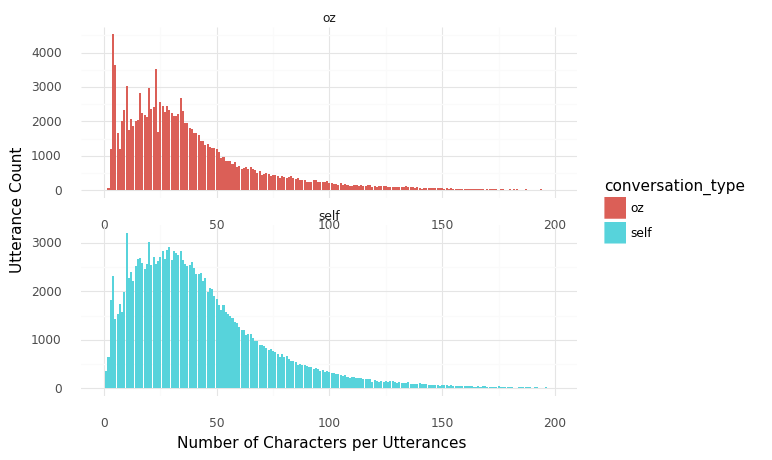

<ggplot: (-9223363279267934881)>

In [13]:
#number of characters
char_df = all_df[['conversation_type','nb_char','text']].groupby(['conversation_type','nb_char'])\
    .count().reset_index()
char_df.columns = ['conversation_type','nb_char','nb_utterances']
g = (ggplot(char_df,aes(x='nb_char',y='nb_utterances',fill='conversation_type')) + 
    geom_col() + theme_minimal() + coord_cartesian(xlim=[0,200]) +
    facet_wrap('~conversation_type',ncol=1,scales='free') +
    xlab('Number of Characters per Utterances') + ylab('Utterance Count'))
g

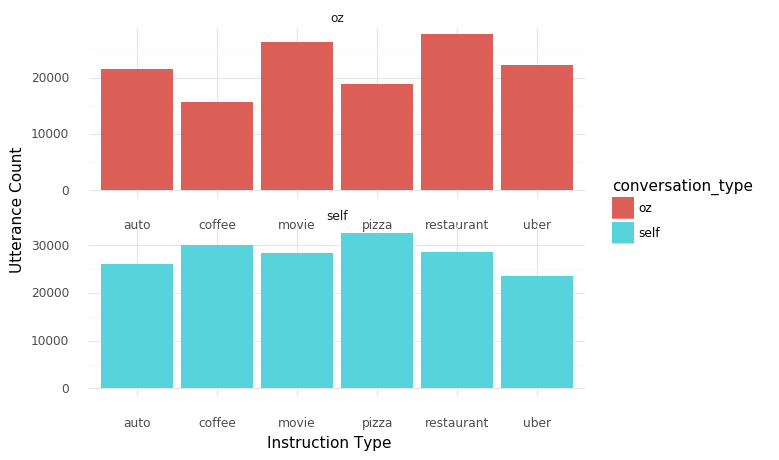

<ggplot: (8757561533928)>

In [14]:
#instruction type
all_df['instruction_type'] = all_df.instruction_id.map(lambda x: x.split('-')[0])
instruct_df = all_df[['conversation_type','instruction_type','text']]\
    .groupby(['conversation_type','instruction_type']).count().reset_index()

g = (ggplot(instruct_df,aes(x='instruction_type',y='text',fill='conversation_type')) + 
    geom_col() + theme_minimal() +
    facet_wrap('~conversation_type',ncol=1,scales='free') +
    xlab('Instruction Type') + ylab('Utterance Count'))
g

In [15]:
all_df.head()

,conversation_id,instruction_id,index,speaker,text,nb_token,nb_char,conversation_type,instruction_type
0,dlg-00055f4e-4a46-48bf-8d99-4e477663eb23,restaurant-table-2,0,USER,"Hi, I'm looking to book a table for Korean fod.",10,47,self,restaurant
1,dlg-00055f4e-4a46-48bf-8d99-4e477663eb23,restaurant-table-2,1,ASSISTANT,"Ok, what area are you thinking about?",7,37,self,restaurant
2,dlg-00055f4e-4a46-48bf-8d99-4e477663eb23,restaurant-table-2,2,USER,"Somewhere in Southern NYC, maybe the East Vill...",8,50,self,restaurant
3,dlg-00055f4e-4a46-48bf-8d99-4e477663eb23,restaurant-table-2,3,ASSISTANT,"Ok, great. There's Thursday Kitchen, it has g...",9,59,self,restaurant
4,dlg-00055f4e-4a46-48bf-8d99-4e477663eb23,restaurant-table-2,4,USER,That's great. So I need a table for tonight at...,28,125,self,restaurant


In [17]:
#deduplicate utterances by lowering
all_df['text_lower'] = all_df.text.map(lambda x: str(x).lower())
dup_df = all_df[['text','text_lower','nb_token','conversation_type']]\
    .groupby(['text_lower','nb_token']).agg({'text':max,'conversation_type':len}).reset_index()
print(dup_df.shape)
dup_df.sort_values('conversation_type',ascending=False).head(20)

(208673, 4)


,text_lower,nb_token,text,conversation_type
201186,yes.,1,yes.,3988
154763,thank you.,2,thank you.,2278
132198,okay.,1,okay.,2215
48817,"hi, how can i help you?",6,"hi, how can i help you?",1733
961,(deleted),1,(deleted),1036
192424,yes,1,yes,891
156339,thanks.,1,thanks.,790
20502,bye.,1,bye.,724
198555,"yes, please.",2,"yes, please.",712
153440,thank you,2,thank you,602


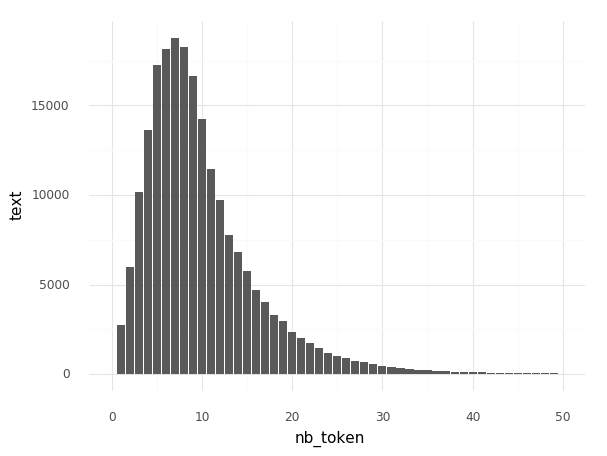

<ggplot: (-9223363279294852699)>

In [18]:
dup_agg = dup_df[['nb_token','text']].groupby('nb_token').count().reset_index()
g = (ggplot(dup_agg, aes(x='nb_token',y='text')) + geom_col() + 
     theme_minimal()+ coord_cartesian(xlim=[0,50]))
g

In [204]:
#might not be good idea to use those lower than 3 tokens
dup_df[dup_df.nb_token<=2].head()

,text_lower,nb_token,text,conversation_type
0,310-555-9023.,1,310-555-9023.,4
1,614-585-9978,1,614-585-9978,1
2,937-888-5855,1,937-888-5855,1
3,9:00 p.m.,2,9:00 p.m.,1
20,anything else?,2,Anything else?,1


In [205]:
#more than 2 tokens
export_df = dup_df[dup_df.nb_token>2][['text','nb_token']].reset_index(drop=True)
export_df.head()

,text,nb_token
0,A Japanese restaurant.,3
1,A large Coke. That's it.,5
2,a later day is available sir,6
3,A local place would be nice,6
4,"An artichoke, spinach and mushroom pizza with...",9


In [202]:
# #replace dollar signs; saving not that many so not doing
# import re
# def replace_monetary(s):
#     dollar_ = '[\$]\d+(\.\d{1,2})?'
#     range_ = '[\-]\d+(\.\d{1,2})?'
#     replaced = re.sub(dollar_, 'DOLLAR_VALUE', s)
#     replaced = re.sub(range_, '-DOLLAR_VALUE', replaced)
#     return replaced
# export_df['text'] = export_df.text.map(replace_monetary)
# export_df.groupby('text').count().shape, export_df.shape

((199079, 1), (199936, 2))

In [222]:
#deduplicate with fuzzymatch
from fuzzywuzzy import fuzz
threshold=90
dfs = []
matched = []
n = export_df.shape[0]
for i in tqdm_notebook(range(n)):
    if i in matched: continue #if already matched, skip
    t1=export_df.text[i]
    dfs.append({'text_id':i,'text':t1,'nb_token':export_df.nb_token[i]})
    for j in range(i+1,min(i+1+300,n)): #deduplicate within same conversation (300 utterances)
        t2=export_df.text[j]
        if fuzz.ratio(t1,t2)>=threshold:
            dfs.append({'text_id':i,'text':t2,'nb_token':export_df.nb_token[j]})
            matched.append(j)

In [259]:
fuzzy_export = pd.DataFrame(dfs)
fuzzy_export['rnk'] = fuzzy_export.groupby('text_id').cumcount()+1
# fuzzy_export = fuzzy_export.groupby('text').agg({'text_id':min, 'rnk':min, 'nb_token':min}).reset_index()
fuzzy_export.shape,fuzzy_export.text_id.nunique(), export_df.shape
# #get longest text to translate
# fuzzy_export = fuzzy_export[fuzzy_export['rank']==1]
# fuzzy_export.head()

((202077, 4), 184567, (199936, 2))

In [244]:
fuzzy_export[fuzzy_export.text_id==165]

,nb_token,text,text_id,rnk
165,15,Okay your the tickets are being sent to your ...,165,1
166,14,your the tickets are being sent to your mobil...,165,2
167,14,your the tickets are being sent to your mobil...,165,3


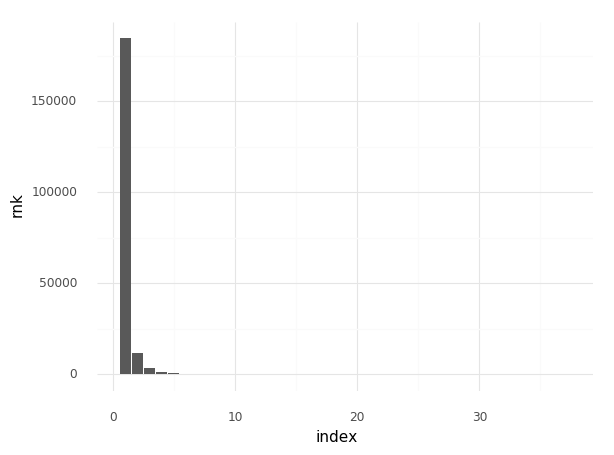

<ggplot: (-9223363279309810446)>

In [245]:
#fuzzy matched
fuzzy_matched = pd.DataFrame(fuzzy_export['rnk'].value_counts())
fuzzy_matched = fuzzy_matched.reset_index()
g = (ggplot(fuzzy_matched, aes(x='index',y='rnk')) + geom_col()+
    theme_minimal())
g

In [264]:
#get only rnk=1
fuzzy_export = fuzzy_export[fuzzy_export.rnk==1]
fuzzy_export['text_cleaned'] = fuzzy_export.text.map(lambda x: re.sub('\"','',x)) #remove "
fuzzy_export['text_cleaned'] = fuzzy_export.text_cleaned.map(lambda x: re.sub('^ ','',x)) #remove space before
fuzzy_export.shape

(184567, 5)

In [265]:
fuzzy_export['text_cleaned'].to_csv(f'{data_path}taskmaster1.txt',header=None,index=None)

In [266]:
fuzzy_export.to_csv(f'{data_path}taskmaster1.csv',index=None)

In [267]:
fuzzy_export.head(10)

,nb_token,text,text_id,rnk,text_cleaned
0,3,A Japanese restaurant.,0,1,A Japanese restaurant.
1,5,A large Coke. That's it.,1,1,A large Coke. That's it.
2,6,a later day is available sir,2,1,a later day is available sir
3,6,A local place would be nice,3,1,A local place would be nice
4,9,"An artichoke, spinach and mushroom pizza with...",4,1,"An artichoke, spinach and mushroom pizza with ..."
5,7,And address where we can reach you?,5,1,And address where we can reach you?
6,4,And for what day?,6,1,And for what day?
7,6,And how much will it cost?,7,1,And how much will it cost?
8,10,and i want to see it in black and white,8,1,and i want to see it in black and white
9,6,And the name on the reservation?,9,1,And the name on the reservation?
